# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | san fernando de apure
Processing Record 3 of Set 1 | glace bay
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | skutskar
City not found. Skipping...
Processing Record 8 of Set 1 | okhotsk
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | boticas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | keetmanshoop
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | olavarria
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | brisas de zicatela
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | avarua
Pr

Processing Record 40 of Set 4 | constantia
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | conception bay south
Processing Record 43 of Set 4 | muang khong
Processing Record 44 of Set 4 | las khorey
Processing Record 45 of Set 4 | grand falls-windsor
Processing Record 46 of Set 4 | port sudan
Processing Record 47 of Set 4 | mirny
Processing Record 48 of Set 4 | labrador city
Processing Record 49 of Set 4 | watseka
Processing Record 0 of Set 5 | baardheere
Processing Record 1 of Set 5 | arenal
Processing Record 2 of Set 5 | khandyga
Processing Record 3 of Set 5 | palmas de monte alto
Processing Record 4 of Set 5 | dryden
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | mek'ele
Processing Record 7 of Set 5 | valparaiso
Processing Record 8 of Set 5 | qamdo
Processing Record 9 of Set 5 | parauapebas
Processing Record 10 of Set 5 | jalai nur
Processing Record 11 of Set 5 | alaghsas
Processing Record 12 of Set 5 | olinda
Processing Record 13 of S

Processing Record 30 of Set 8 | yemel'yanovo
Processing Record 31 of Set 8 | lluta
Processing Record 32 of Set 8 | badger
Processing Record 33 of Set 8 | bouar
Processing Record 34 of Set 8 | alice springs
Processing Record 35 of Set 8 | imbituba
Processing Record 36 of Set 8 | port saint john's
Processing Record 37 of Set 8 | kigonsera
Processing Record 38 of Set 8 | uliastay
Processing Record 39 of Set 8 | palmer
Processing Record 40 of Set 8 | xiaolingwei
Processing Record 41 of Set 8 | lodwar
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | bantay
Processing Record 44 of Set 8 | az zawiyah
Processing Record 45 of Set 8 | khor
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | bonanza
Processing Record 49 of Set 8 | richards bay
Processing Record 0 of Set 9 | gumdag
Processing Record 1 of Set 9 | savanna-la-mar
Processing Record 2 of Set 9 | kayangel
Processing Record 3 of Set 9 | veraval
Processi

Processing Record 20 of Set 12 | lospalos
Processing Record 21 of Set 12 | mizan teferi
Processing Record 22 of Set 12 | okha
Processing Record 23 of Set 12 | berea
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | borogontsy
Processing Record 26 of Set 12 | nasiriyah
Processing Record 27 of Set 12 | queenstown
Processing Record 28 of Set 12 | bikenibeu village
Processing Record 29 of Set 12 | meraux
Processing Record 30 of Set 12 | polatli
Processing Record 31 of Set 12 | san pedro pochutla
Processing Record 32 of Set 12 | matane
Processing Record 33 of Set 12 | gebeit
Processing Record 34 of Set 12 | curup
Processing Record 35 of Set 12 | villa gesell
Processing Record 36 of Set 12 | axim
Processing Record 37 of Set 12 | sagaing
Processing Record 38 of Set 12 | winsted
Processing Record 39 of Set 12 | quincy
Processing Record 40 of Set 12 | veinticinco de mayo
Processing Record 41 of Set 12 | tazacorte
Processing Record 42 of Set 12 | novodvinsk
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,26.99,74,40,7.20,CC,1696996519
1,san fernando de apure,7.8878,-67.4724,23.96,91,12,1.65,VE,1696996519
2,glace bay,46.1969,-59.9570,11.99,96,75,3.09,CA,1696996520
3,edinburgh of the seven seas,-37.0676,-12.3116,13.40,94,100,7.87,SH,1696996520
4,port-aux-francais,-49.3500,70.2167,1.68,66,100,14.96,TF,1696996520


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,74,40,7.20,CC,1696996519
1,san fernando de apure,7.8878,-67.4724,23.96,91,12,1.65,VE,1696996519
2,glace bay,46.1969,-59.9570,11.99,96,75,3.09,CA,1696996520
3,edinburgh of the seven seas,-37.0676,-12.3116,13.40,94,100,7.87,SH,1696996520
4,port-aux-francais,-49.3500,70.2167,1.68,66,100,14.96,TF,1696996520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

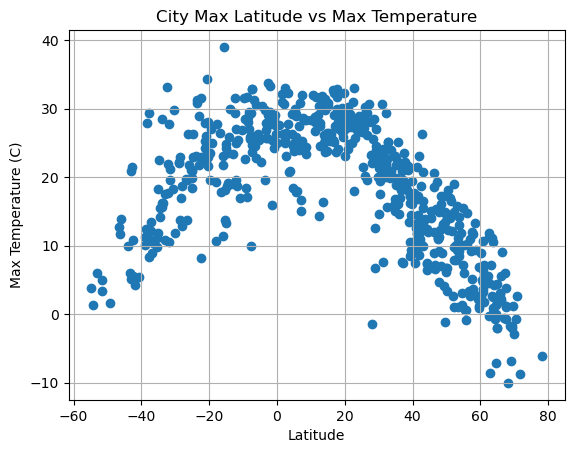

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs Max Temperature')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

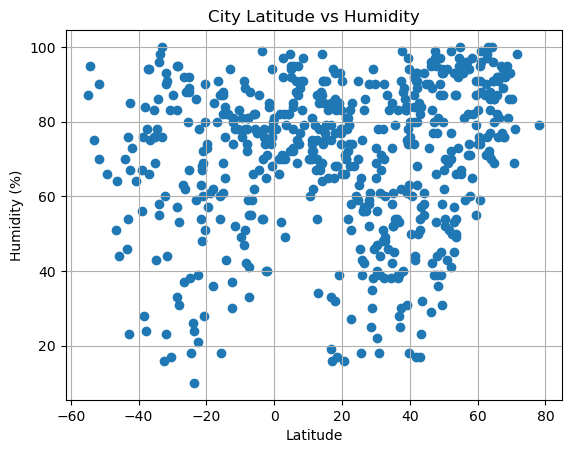

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

plt.title('City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

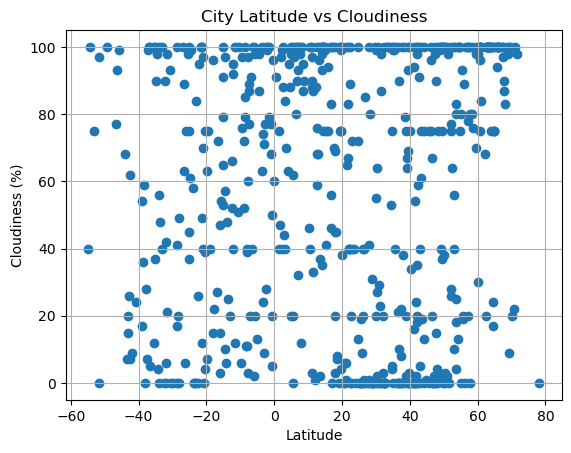

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

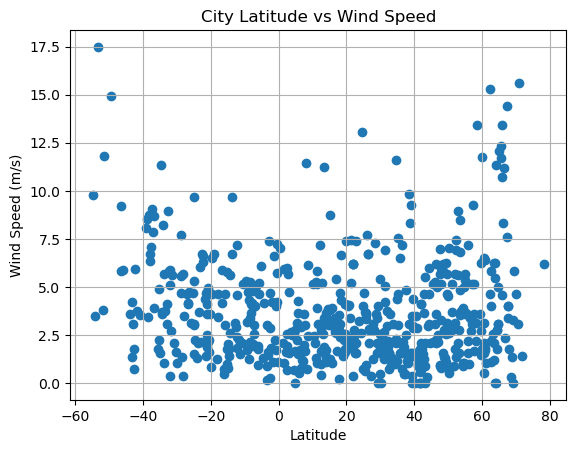

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def regressfunction (hemi_param, weather_param):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemi_param, weather_param)
    line_plot = hemi_param * slope + intercept
    line_annotate = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_value = f"The r-value is: {round(rvalue,2)}"
    return line_plot, line_annotate, r_value

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san fernando de apure,7.8878,-67.4724,23.96,91,12,1.65,VE,1696996519
2,glace bay,46.1969,-59.9570,11.99,96,75,3.09,CA,1696996520
5,longyearbyen,78.2186,15.6401,-6.09,79,0,6.17,SJ,1696996520
6,okhotsk,59.3833,143.3000,2.29,91,70,3.57,RU,1696996520
7,tiksi,71.6872,128.8694,-8.76,98,98,1.42,RU,1696996520


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,74,40,7.20,CC,1696996519
3,edinburgh of the seven seas,-37.0676,-12.3116,13.40,94,100,7.87,SH,1696996520
4,port-aux-francais,-49.3500,70.2167,1.68,66,100,14.96,TF,1696996520
9,ushuaia,-54.8000,-68.3000,3.81,87,40,9.77,AR,1696996521
10,keetmanshoop,-26.5833,18.1333,19.51,37,63,4.12,NaN,1696996521


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.86


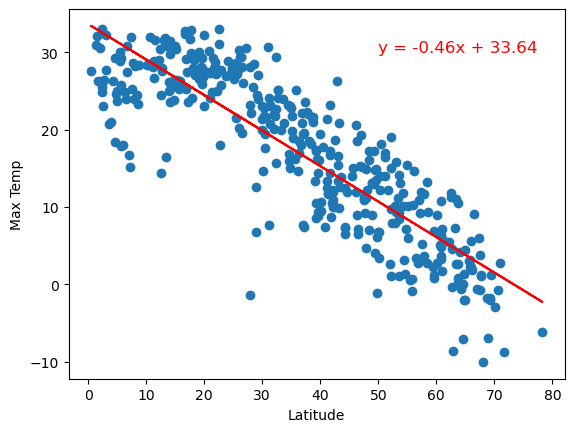

In [33]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[1],(50,30),fontsize=12,color='r')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[2])
plt.show()

The r-value is: 0.69


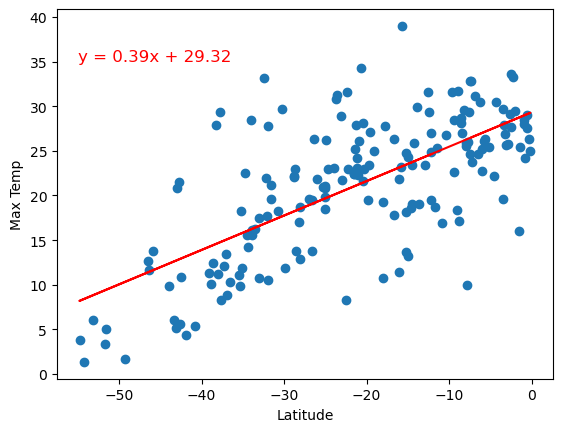

In [35]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[1],(-55, 35),fontsize=12,color='r')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[2])
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemisphere r values show a strong correlation between latitude and max temperature. Cities further from the equator can be predicted to have a lower temperature based on this.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13


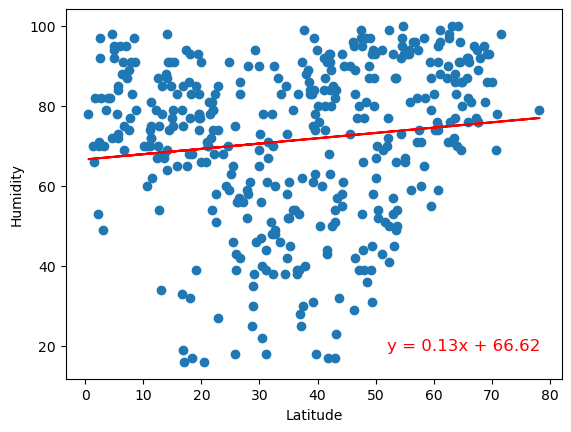

In [36]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[1],(52, 19),fontsize=12,color='r')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[2])
plt.show()

The r-value is: 0.05


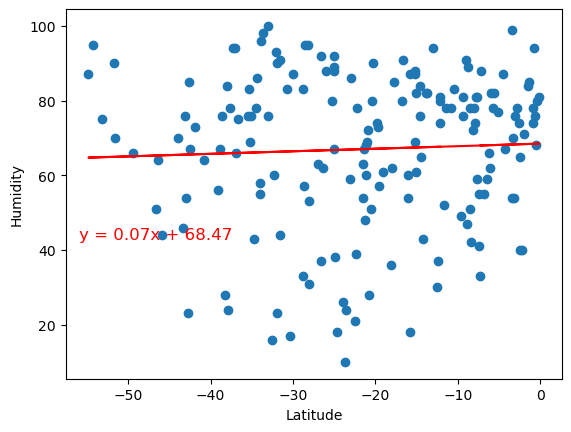

In [37]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[1],(-56, 43),fontsize=12,color='r')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[2])
plt.show()

**Discussion about the linear relationship:** Both northern and southern hemisphere have a slightly positive correlation between humidity and latitude but, not enough evidence to make concrete conclusions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07


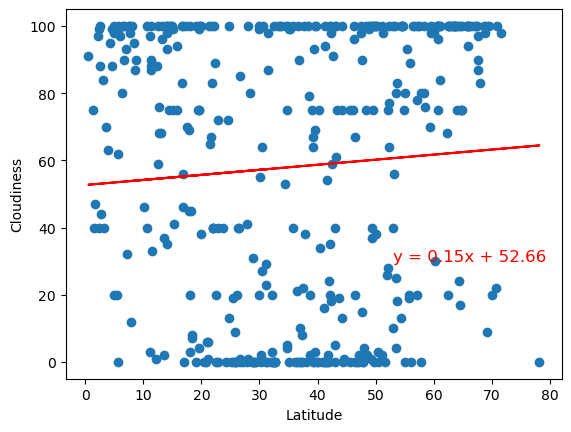

In [38]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[1],(53, 30),fontsize=12,color='r')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[2])
plt.show()

The r-value is: 0.11


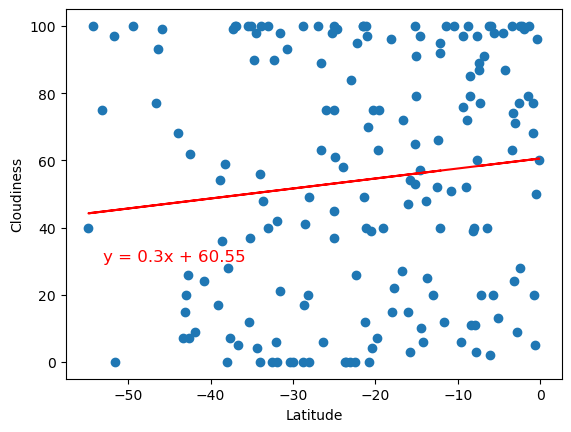

In [41]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[1],(-53, 30),fontsize=12,color='r')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[2])
plt.show()

**Discussion about the linear relationship:** Both northern and southern hemisphere have a slightly positive correlation between cloudiness and latitude but, not enough evidence to make concrete conclusions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.19


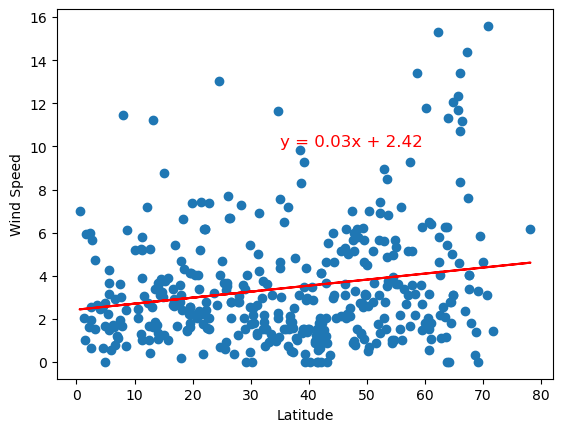

In [42]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[1],(35, 10),fontsize=12,color='r')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[2])
plt.show()

The r-value is: -0.38


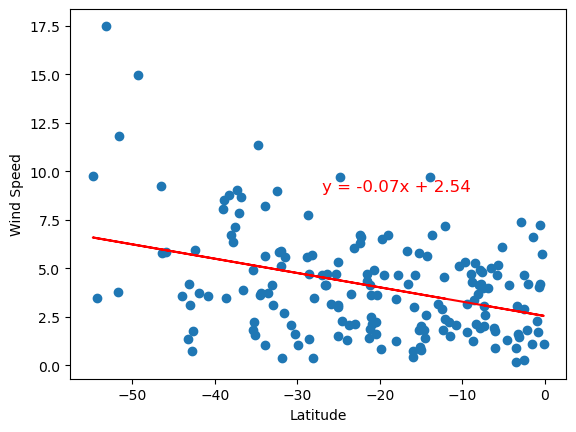

In [43]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[1],(-27, 9),fontsize=12,color='r')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[2])
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between wind speed and latitude for both northern and southern hemispheres. From the southern hemisphere plot, you could argue that wind speed will be stronger based on the further you get from the equator.